Epoch 1/2
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4790 - accuracy: 0.4700 - val_loss: 1.2018 - val_accuracy: 0.5792
Epoch 2/2
313/313 [==============================] - 5s 16ms/step - loss: 1.0777 - accuracy: 0.6295
Test accuracy: 0.6294999718666077
Available keys in model history: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


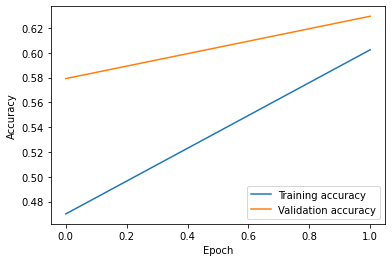

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize images

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10)  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Print history keys
print("Available keys in model history:", history.history.keys())

# Plot training and validation accuracy
accuracy_key = 'accuracy' if 'accuracy' in history.history else 'acc'
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'

if accuracy_key in history.history and val_accuracy_key in history.history:
    plt.plot(history.history[accuracy_key], label='Training accuracy')
    plt.plot(history.history[val_accuracy_key], label='Validation accuracy')
else:
    print(f"Keys '{accuracy_key}' or '{val_accuracy_key}' not found in history.")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
